# Zadanie 1

In [65]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [54]:
def pagerank_1(M, num_iterations: int = 100, d: float = 0.85):
    N = M.shape[1]
    v = np.ones(N) / N
    M_hat = (d * M)
    for _ in range(num_iterations):
        v = M_hat @ v
    return v

In [55]:
M = np.array([[0, 0, 0, 0, 1],
              [0.5, 0, 0, 0, 0],
              [0.5, 0, 0, 0, 0],
              [0, 1, 0.5, 0, 0],
              [0, 0, 0.5, 1, 0]])
v = pagerank_1(M, 100, 0.85)
print(v)

[2.33149686e-08 1.16621721e-08 1.16621721e-08 1.75060966e-08
 2.33313270e-08]


# Zadanie 2

In [84]:
# https://en.wikipedia.org/wiki/PageRank
def pagerank_2(M, num_iterations: int = 100, d: float = 0.85):
    N = M.shape[1]
    v = np.ones(N) / N
    # M_hat = (d * M + (1 - d) / N)
    norms = []
    for i in range(num_iterations):
        v_last = v
        v = d * M @ v + (1 - d) / N
        norms.append(np.linalg.norm(v - v_last,1))
    return v,norms

[0.25419178 0.13803151 0.13803151 0.20599017 0.26375504]


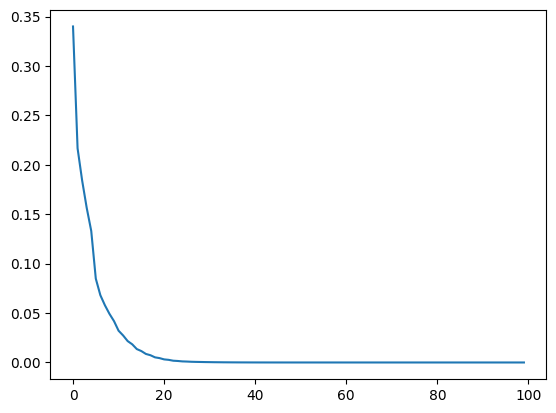

In [85]:
M = np.array([[0, 0, 0, 0, 1],
              [0.5, 0, 0, 0, 0],
              [0.5, 0, 0, 0, 0],
              [0, 1, 0.5, 0, 0],
              [0, 0, 0.5, 1, 0]])
v,norms = pagerank_2(M, 100, 0.85)
print(v)

plt.plot(norms)


In [3]:
# https://www.geeksforgeeks.org/page-rank-algorithm-implementation/
def pagerank(G, alpha=0.85, personalization=None,
			max_iter=100, tol=1.0e-6, nstart=None, weight='weight',
			dangling=None):

	if len(G) == 0:
		return {}

	if not G.is_directed():
		D = G.to_directed()
	else:
		D = G

	# Create a copy in (right) stochastic form
	W = nx.stochastic_graph(D, weight=weight)
	N = W.number_of_nodes()

	# Choose fixed starting vector if not given
	if nstart is None:
		x = dict.fromkeys(W, 1.0 / N)
	else:
		# Normalized nstart vector
		s = float(sum(nstart.values()))
		x = dict((k, v / s) for k, v in nstart.items())

	if personalization is None:

		# Assign uniform personalization vector if not given
		p = dict.fromkeys(W, 1.0 / N)
	else:
		missing = set(G) - set(personalization)
		if missing:
			raise NetworkXError('Personalization dictionary '
								'must have a value for every node. '
								'Missing nodes %s' % missing)
		s = float(sum(personalization.values()))
		p = dict((k, v / s) for k, v in personalization.items())

	if dangling is None:

		# Use personalization vector if dangling vector not specified
		dangling_weights = p
	else:
		missing = set(G) - set(dangling)
		if missing:
			raise NetworkXError('Dangling node dictionary '
								'must have a value for every node. '
								'Missing nodes %s' % missing)
		s = float(sum(dangling.values()))
		dangling_weights = dict((k, v/s) for k, v in dangling.items())
	dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]

	# power iteration: make up to max_iter iterations
	for _ in range(max_iter):
		xlast = x
		x = dict.fromkeys(xlast.keys(), 0)
		danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
		for n in x:

			# this matrix multiply looks odd because it is
			# doing a left multiply x^T=xlast^T*W
			for nbr in W[n]:
				x[nbr] += alpha * xlast[n] * W[n][nbr][weight]
			x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]

		# check convergence, l1 norm
		err = sum([abs(x[n] - xlast[n]) for n in x])
		if err < N*tol:
			return x
	raise NetworkXError('pagerank: power iteration failed to converge '
						'in %d iterations.' % max_iter)


In [5]:

G=nx.barabasi_albert_graph(60,41)
pr=nx.pagerank(G)
pr

{0: 0.035990077618838455,
 1: 0.011342408252558781,
 2: 0.010825939887623438,
 3: 0.010305377313779548,
 4: 0.010821056467120664,
 5: 0.010298838155168058,
 6: 0.009261354158945627,
 7: 0.01030222063478433,
 8: 0.009779328121444334,
 9: 0.012386742963496584,
 10: 0.010300607189311911,
 11: 0.00926322824874053,
 12: 0.00978166693211422,
 13: 0.010822356493763088,
 14: 0.010821809447717245,
 15: 0.006663695394916744,
 16: 0.01134609254982751,
 17: 0.010823294173520783,
 18: 0.011344131152090845,
 19: 0.009257976174426606,
 20: 0.009263883638025931,
 21: 0.010824617205790357,
 22: 0.00977707355981408,
 23: 0.01030437846499736,
 24: 0.010300740075252585,
 25: 0.009258447189886429,
 26: 0.010301561139600218,
 27: 0.01030151301800174,
 28: 0.009262819573298194,
 29: 0.011344741844598402,
 30: 0.01134523618554289,
 31: 0.011864835840128093,
 32: 0.009778342442636569,
 33: 0.011344018117596014,
 34: 0.01134689263758371,
 35: 0.010828279976854342,
 36: 0.010302518075395894,
 37: 0.0108222616542

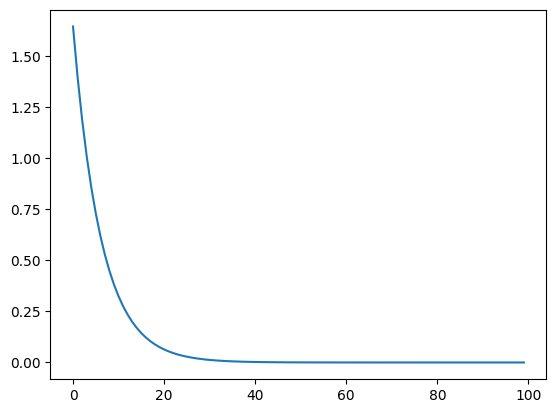

In [99]:
G=nx.barabasi_albert_graph(60,59)
M = nx.adjacency_matrix(nx.stochastic_graph(G.to_directed())).todense().T

v,norms = pagerank_2(M)

plt.plot(norms)